In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
#!pip install keras

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install pydot

In [3]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
X_train_digit[0] # viewing the training set input

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train_digit[0] # viewing traing set ouput

5

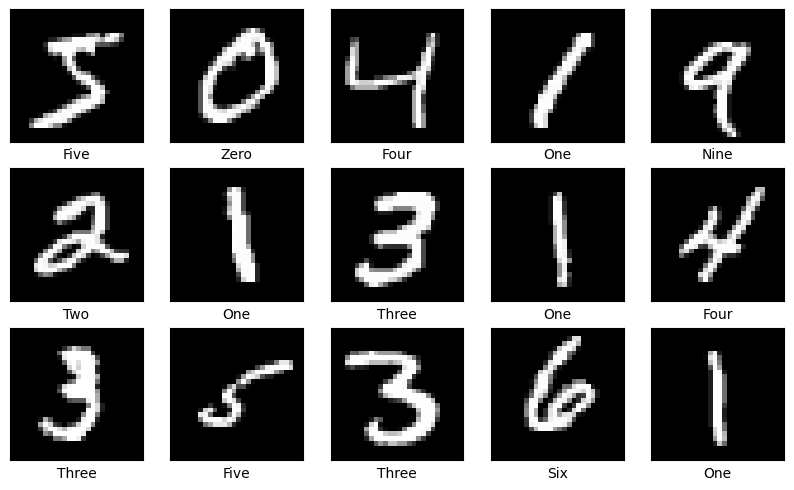

In [6]:
# Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])

plt.show()

In [7]:
X_train_digit.shape

(60000, 28, 28)

In [8]:
X_test_digit.shape

(10000, 28, 28)

In [9]:
# ANN accepts only 2D array as input so flatenning is done. 
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [10]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
# ANN accepts one hot encoding format as output
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [13]:
y_train_digit[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
# Creating base neural network
model=keras.Sequential([
    layers.Dense( 256, activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# param = output neurons * (input neurons + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [17]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(X_test_digit,y_test_digit) )

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.7697 - loss: 7.2545 - val_accuracy: 0.9203 - val_loss: 0.4183
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9360 - loss: 0.2852 - val_accuracy: 0.9381 - val_loss: 0.2632
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9544 - loss: 0.1732 - val_accuracy: 0.9416 - val_loss: 0.2272
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9670 - loss: 0.1187 - val_accuracy: 0.9560 - val_loss: 0.1792
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9716 - loss: 0.1033 - val_accuracy: 0.9519 - val_loss: 0.2153
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9722 - loss: 0.1005 - val_accuracy: 0.9609 - val_loss: 0.1639
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.9748 - loss: 0.0856 - val_accuracy: 0.9623 - val_loss: 0.1683
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9765 - loss: 0.0833 - 

In [18]:
# Predicting the labels-DIGIT
y_predict=model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [19]:
y_predict[0]

array([9.6391068e-07, 8.7403488e-01, 2.5322806e-04, 9.1131634e-01,
       2.2256293e-06, 8.5765632e-06, 8.9359435e-09, 1.0000000e+00,
       2.0951664e-05, 7.8165114e-01], dtype=float32)

In [20]:
# getting maximium value in predicted vector
y_predicts=np.argmax(y_predict , axis=1) 

In [21]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [23]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_6524\1537462102.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


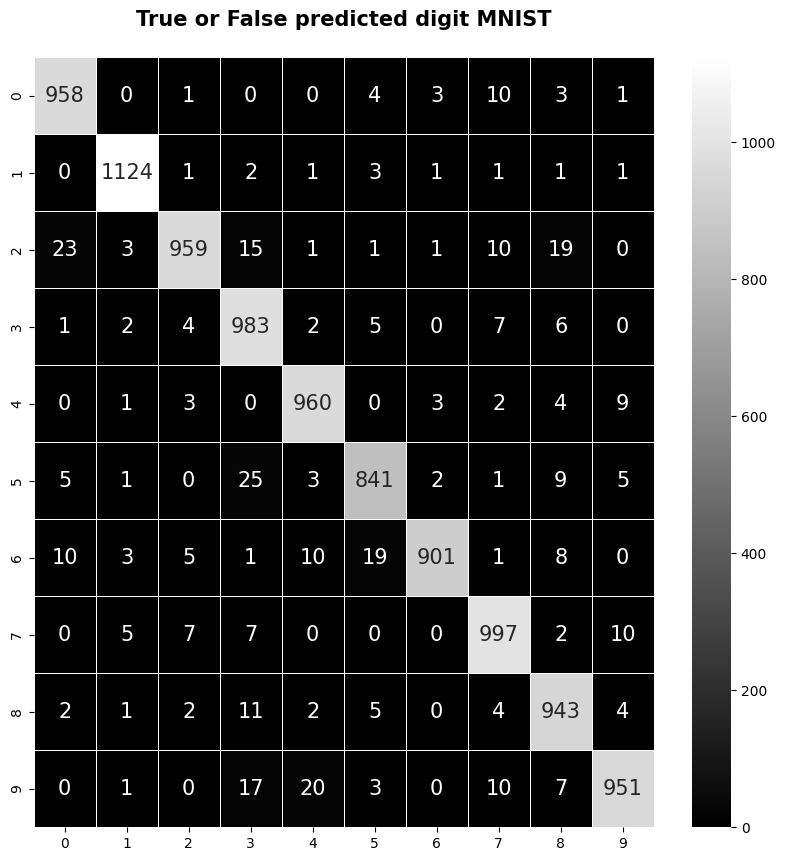

In [24]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.93      0.95      1032
           3       0.93      0.97      0.95      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.94      0.95       892
           6       0.99      0.94      0.96       958
           7       0.96      0.97      0.96      1028
           8       0.94      0.97      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



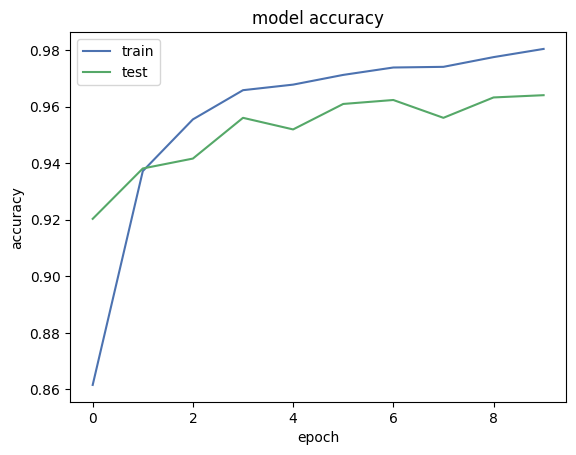

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy']) # plot the accuracy stored in history object during fit() is called
plt.plot(history.history['val_accuracy']) # plot the val_accuracy stored in history object during fit() is called
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

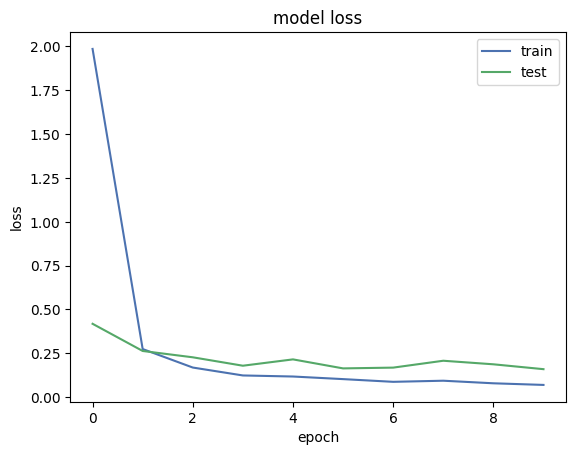

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [28]:
y_predict_single=model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1)
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


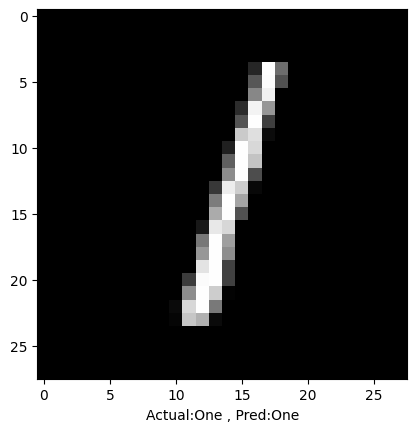

In [29]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{} , Pred:{}".format(col_names[y_test_digit_eval[2]],col_names[y_predicts_single[0]]))
plt.show()